The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [188]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Start coding here!
nobel = pd.read_csv('data/nobel.csv')

In [189]:
print(nobel.head(10))

   year    category  ...      death_city   death_country
0  1901   Chemistry  ...          Berlin         Germany
1  1901  Literature  ...        Châtenay          France
2  1901    Medicine  ...         Marburg         Germany
3  1901       Peace  ...          Heiden     Switzerland
4  1901       Peace  ...           Paris          France
5  1901     Physics  ...          Munich         Germany
6  1902   Chemistry  ...          Berlin         Germany
7  1902  Literature  ...  Charlottenburg         Germany
8  1902    Medicine  ...    Putney Heath  United Kingdom
9  1902       Peace  ...            Bern     Switzerland

[10 rows x 18 columns]


In [190]:
print(nobel.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


In [191]:
print(nobel.isnull().sum())

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64


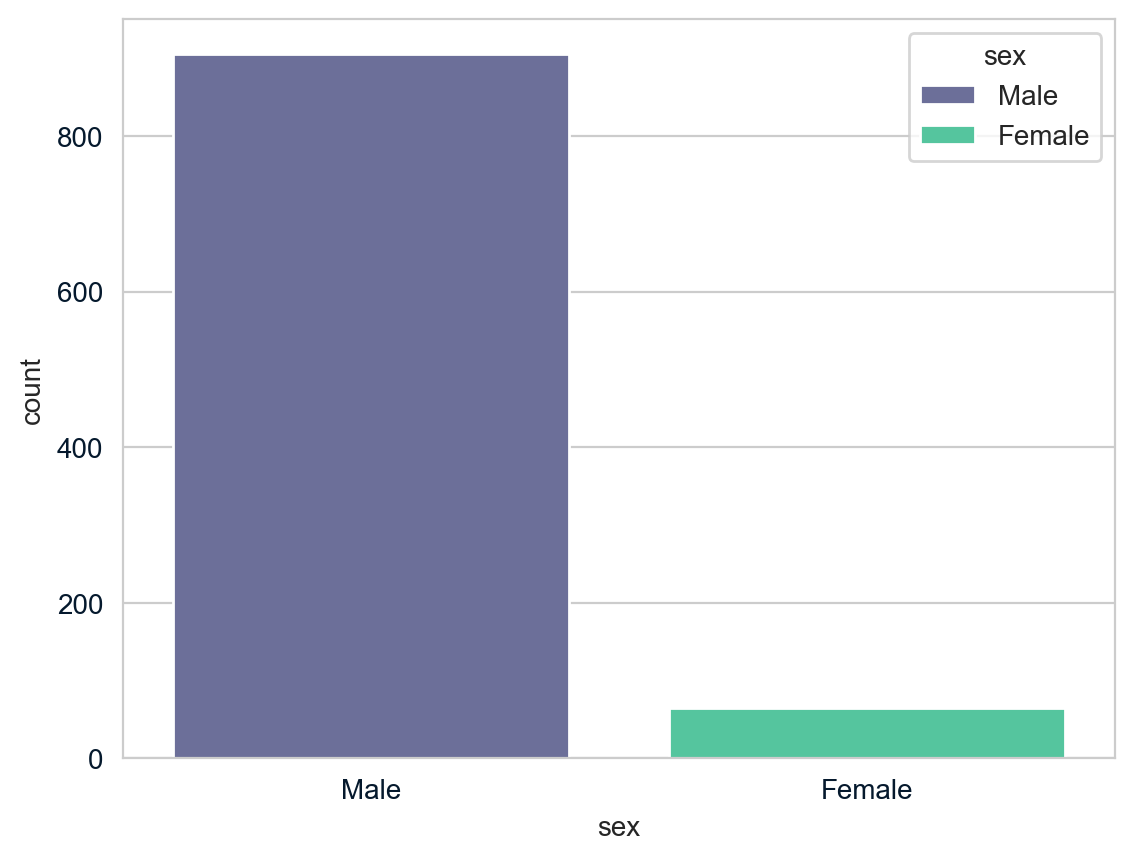

In [192]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=nobel, hue='sex')
plt.show()

In [193]:
# Most awarded gender
print(nobel['sex'].value_counts())
top_gender = nobel['sex'].value_counts().index[0]
print("Most awarded gender is: "+top_gender)

Male      905
Female     65
Name: sex, dtype: int64
Most awarded gender is: Male


In [194]:
# Most awarded country
print(nobel['birth_country'].value_counts())
top_country = nobel['birth_country'].value_counts().index[0]
print("Most awarded birth country is: "+top_country)

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64
Most awarded birth country is: United States of America


In [195]:
nobel['decade'] = (nobel['year'] // 10) * 10
winners_per_decade = nobel.groupby('decade').size()
print(winners_per_decade)

decade
1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010    121
2020     50
dtype: int64


In [196]:
nobel['us_winner'] = nobel['birth_country'] == 'United States of America'

In [197]:
# Calculating ratio:
ratio = nobel.groupby('decade')['us_winner'].agg(['sum', 'count'])
ratio['us_ratio'] = ratio['sum']/ratio['count']
us_ratio = ratio.sort_values('us_ratio', ascending=False)
print(us_ratio)

        sum  count  us_ratio
decade                      
2000     52    123  0.422764
1990     42    104  0.403846
2020     18     50  0.360000
1980     31     97  0.319588
1970     33    104  0.317308
2010     38    121  0.314050
1940     13     43  0.302326
1950     21     72  0.291667
1960     21     79  0.265823
1930     14     56  0.250000
1910      3     40  0.075000
1920      4     54  0.074074
1900      1     57  0.017544


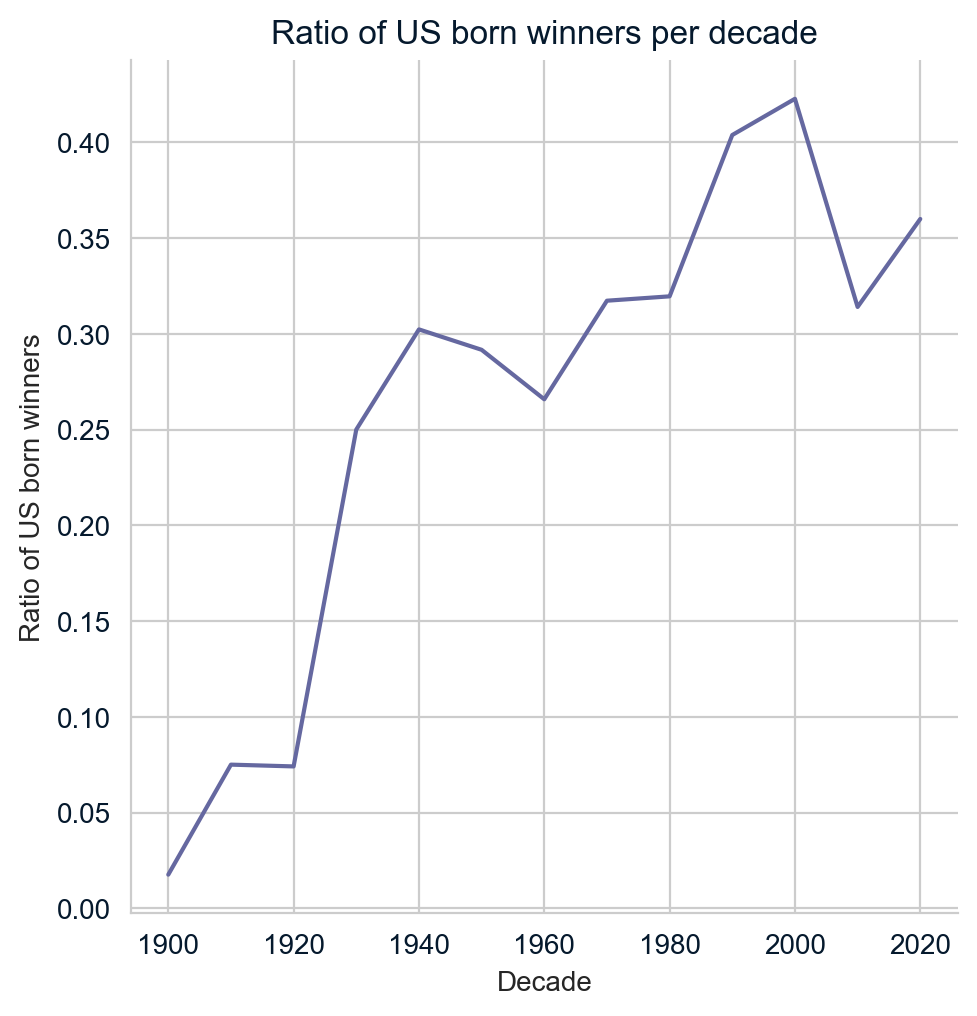

In [198]:
sns.relplot(x='decade', y='us_ratio', data=us_ratio, kind='line')
plt.xlabel('Decade')
plt.ylabel('Ratio of US born winners')
plt.title('Ratio of US born winners per decade')
plt.show()

In [199]:
max_decade_usa = us_ratio.index[0]
print(max_decade_usa)

2000


In [200]:
#print(nobel.groupby('decade')['sex'].value_counts())
grouped_data = nobel.groupby(['decade', 'sex']).size().reset_index(name='count')
print(grouped_data)

    decade     sex  count
0     1900  Female      3
1     1900    Male     53
2     1910  Female      1
3     1910    Male     37
4     1920  Female      2
5     1920    Male     52
6     1930  Female      3
7     1930    Male     52
8     1940  Female      3
9     1940    Male     37
10    1950    Male     71
11    1960  Female      3
12    1960    Male     72
13    1970  Female      4
14    1970    Male     99
15    1980  Female      4
16    1980    Male     90
17    1990  Female      7
18    1990    Male     94
19    2000  Female     11
20    2000    Male    108
21    2010  Female     13
22    2010    Male    104
23    2020  Female     11
24    2020    Male     36


In [201]:
nobel['female_winner'] = nobel['sex'] == 'Female'

In [202]:
# Calculating ratio of Females per decade:
f_ratio_per_decade = nobel.groupby('decade')['female_winner'].agg(['sum', 'count'])
f_ratio_per_decade['female_ratio'] = f_ratio_per_decade['sum']/f_ratio_per_decade['count']
female_ratio_decade = f_ratio_per_decade.sort_values('female_ratio', ascending=False)
print(female_ratio_decade.head())
female_ratio_decade = female_ratio_decade.index[0]
print(female_ratio_decade)

        sum  count  female_ratio
decade                          
2020     11     50      0.220000
2010     13    121      0.107438
2000     11    123      0.089431
1940      3     43      0.069767
1990      7    104      0.067308
2020


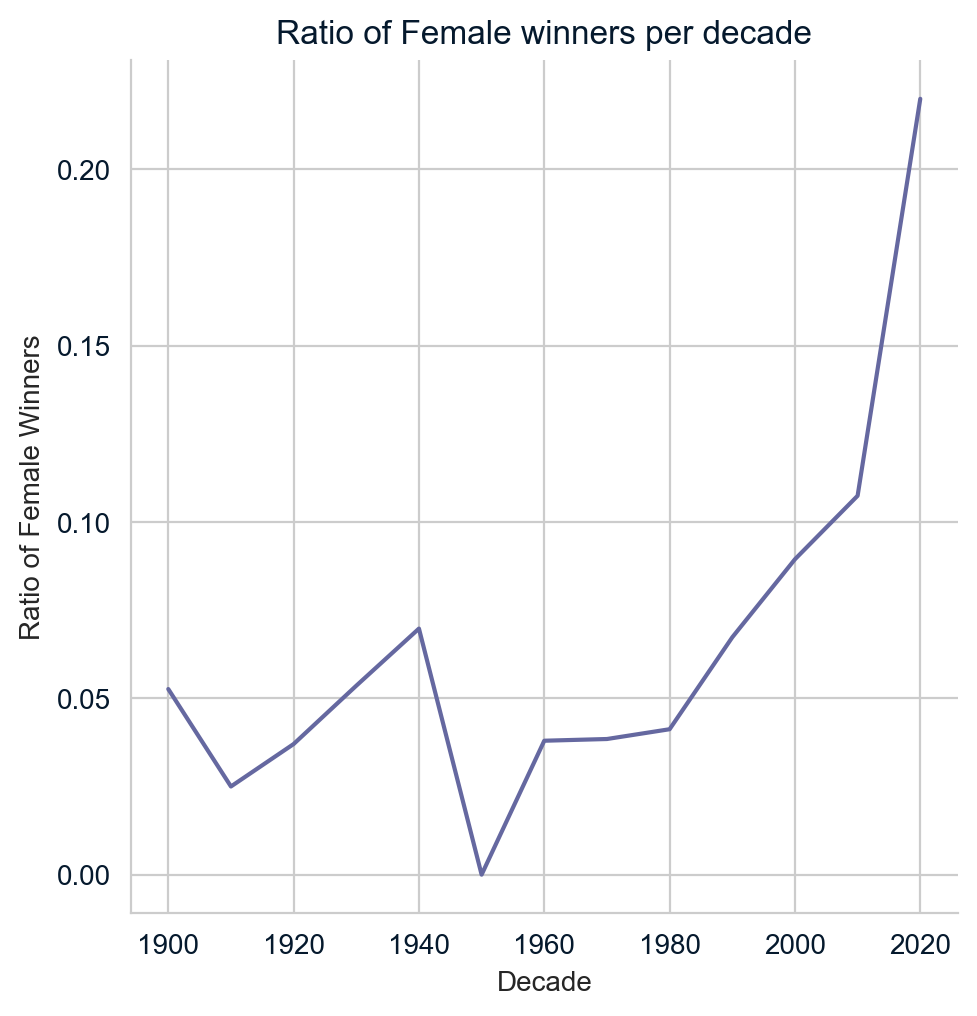

In [203]:
sns.relplot(x='decade', y='female_ratio', data=f_ratio_per_decade, kind='line')
plt.xlabel('Decade')
plt.ylabel('Ratio of Female Winners')
plt.title('Ratio of Female winners per decade')
plt.show()

In [204]:
# Calculating ratio of Females per Category:
f_ratio_per_cat = nobel.groupby('category')['female_winner'].agg(['sum', 'count'])
f_ratio_per_cat['female_ratio'] = f_ratio_per_cat['sum']/f_ratio_per_cat['count']

female_ratio_cat = f_ratio_per_cat.sort_values('female_ratio', ascending=False)
print(female_ratio_cat)
female_ratio_cat = female_ratio_cat.index[0]
print(female_ratio_cat)

            sum  count  female_ratio
category                            
Literature   17    120      0.141667
Peace        19    141      0.134752
Medicine     13    227      0.057269
Chemistry     8    194      0.041237
Economics     3     93      0.032258
Physics       5    225      0.022222
Literature


In [205]:
# Creating Dcitionary
max_female_dict = {
    female_ratio_decade: female_ratio_cat
}
print(max_female_dict)

{2020: 'Literature'}


In [206]:
#Finding First Women Nobel Laureates
first_women_cat = nobel[nobel['sex'] == 'Female'].head(1)[['full_name', 'category']]
#print(first_women_cat)
#print(type(first_women_cat))
#Getting Name and category
first_woman_name, first_woman_category = first_women_cat.iloc[0]
print("Name of the first women is:"+first_woman_name)
print("Category of Award for first women was: "+first_woman_category)

Name of the first women is:Marie Curie, née Sklodowska
Category of Award for first women was: Physics


In [207]:
# Create a mask for names that appear more than once
mask_individuals = nobel['full_name'].value_counts() > 1
repeat_list = list(mask_individuals[mask_individuals].index)
#print(f"List before org:\n {repeated_list}") 
print("Total Number of Repeated Individuals: "+str(len(repeat_list)))


Total Number of Repeated Individuals: 6
